# Define Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets 
from math import exp
import time

start_time = time.time()

# Define Logistic Regression Function

In [2]:

# the logistic function
def logistic_func(theta, x):
    t = x.dot(theta)
    g = np.zeros(t.shape)
    # split into positive and negative to improve stability
    g[t>=0.0] = 1.0 / (1.0 + np.exp(-t[t>=0.0])) 
    g[t<0.0] = np.exp(t[t<0.0]) / (np.exp(t[t<0.0])+1.0)
    return g

# Fit the model

In [3]:
# function to compute log-likelihood
def neg_log_like(theta, x, y):
    g = logistic_func(theta,x)
    return -sum(np.log(g[y>0.5])) - sum(np.log(1-g[y<0.5]))

# Compute the Gradient Decent 

In [4]:
# function to compute the gradient of the negative log-likelihood
def log_grad(theta, x, y):
    g = logistic_func(theta,x)
    return -x.T.dot(y-g)
    
# implementation of gradient descent for logistic regression
def grad_desc(theta, x, y, alpha, tol, maxiter):
    nll_vec = []
    nll_vec.append(neg_log_like(theta, x, y))
    nll_delta = 2.0*tol
    iter = 0
    while (nll_delta > tol) and (iter < maxiter):
        theta = theta - (alpha * log_grad(theta, x, y)) 
        nll_vec.append(neg_log_like(theta, x, y))
        nll_delta = nll_vec[-2]-nll_vec[-1]
        print(nll_delta)
        iter += 1
       
    return iter,theta, np.array(nll_vec)

# Define Prediction function

In [5]:
# function to compute output of LR classifier
def lr_predict(theta,x):
    # form Xtilde for prediction
    shape = x.shape
    Xtilde = np.zeros((shape[0],shape[1]+1))
    Xtilde[:,0] = np.ones(shape[0])
    Xtilde[:,1:] = x
    return logistic_func(theta,Xtilde)

# Generate Random Datasets

In [6]:
## Generate dataset    
np.random.seed(2017) # Set random seed so results are repeatable
x,y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=6.0)

## build classifier
# form Xtilde
shape = x.shape
xtilde = np.zeros((shape[0],shape[1]+1))
xtilde[:,0] = np.ones(shape[0])
xtilde[:,1:] = x

# initialize parameters and call function

In [7]:
# Initialize theta to zero
theta = np.zeros(shape[1]+1)
print(theta.shape)
# Run gradient descent
alpha =0.0000001
tol = 1e-3
maxiter = 10000
iter,theta,cost = grad_desc(theta,xtilde,y,alpha,tol,maxiter)

(3,)
0.01979441959534256
0.01978324382326946
0.01977207442115514
0.019760911387891156
0.01974975472217011
0.019738604422713024
0.019727460488283555
0.019716322917574303
0.019705191709249448
0.0196940668621437
0.019682948374878606
0.019671836246089924
0.019660730474583943
0.01964963105899642
0.019638537997977323
0.019627451290247677
0.01961637093447166
0.019605296929313454
0.019594229273394603
0.01958316796540771
0.019572113004016956
0.019561064387843885
0.019550022115495835
0.019538986185651197
0.019527956596917306
0.01951693334791571
0.019505916437282167
0.019494905863638223
0.019483901625591216
0.019472903721634793
0.019461912150546823
0.019450926910792532
0.019439948000979257
0.019428975419742756
0.019418009165576677
0.01940704923711678
0.01939609563294198
0.019385148351545922
0.019374207391521736
0.019363272751448335
0.019352344429819368
0.01934142242521375
0.019330506736167763
0.019319597361175056
0.019308694298814544
0.019297797547579876
0.0192869071059647
0.019276022972519513
0.

0.01488179300768877
0.01487361264415199
0.014865437531227599
0.014857267666258167
0.014849103046472578
0.014840943669156559
0.014832789531560309
0.014824640630934027
0.01481649696453502
0.014808358529627696
0.014800225323476468
0.014792097343345745
0.0147839745864502
0.014775857050125296
0.014767744731500443
0.01475963762793242
0.014751535736643007
0.014743439054889507
0.014735347579886593
0.01472726130895552
0.014719180239303853
0.01471110436813916
0.014703033692804013
0.014694968210434922
0.01468690791840288
0.014678852813858612
0.014670802894087842
0.014662758156319455
0.014654718597810756
0.01464668421580484
0.014638655007544799
0.014630630970273728
0.014622612101177879
0.014614598397628242
0.014606589856711594
0.014598586475784714
0.014590588252048065
0.014582595182723423
0.014574607265068096
0.014566624496289649
0.01455864687368802
0.014550674394449459
0.014542707055795745
0.014534744855012605
0.0145267877893005
0.014518835855895418
0.014510889052054665
0.014502947374978703
0.014

0.011070403276043805
0.011064712821571732
0.011059026107886893
0.011053343132445548
0.011047663892696846
0.011041988386132573
0.011036316610251617
0.011030648562453393
0.011024984240307845
0.011019323641214385
0.011013666762686114
0.011008013602236133
0.011002364157278066
0.010996718425317908
0.01099107640386876
0.01098543809040109
0.010979803482371153
0.010974172577306263
0.010968545372648464
0.010962921865939279
0.010957302054634965
0.010951685936262834
0.010946073508222298
0.010940464768125935
0.010934859713401579
0.01092925834154812
0.010923660650064448
0.010918066636492085
0.010912476298258866
0.01090688963292763
0.010901306637940422
0.010895727310852976
0.010890151649128654
0.010884579650316084
0.010879011311885733
0.010873446631336492
0.010867885606238303
0.010862328234033214
0.01085677451225564
0.010851224438404472
0.010845678010021231
0.010840135224604808
0.010834596079646985
0.01082906057274613
0.010823528701287444
0.010818000462926136
0.010812475855090042
0.01080695487532068

0.008646664515744362
0.008642551460710024
0.008638441037739142
0.008634333244806669
0.008630228080143354
0.008626125541766783
0.008622025627786911
0.008617928336342118
0.008613833665549464
0.008609741613433641
0.008605652178182766
0.00860156535786416
0.00859748115062331
0.008593399554534642
0.008589320567736536
0.008585244188310526
0.008581170414416306
0.008577099244156727
0.008573030675613325
0.008568964706938687
0.008564901336271191
0.008560840561685268
0.008556782381361927
0.008552726793354282
0.008548673795843342
0.008544623386910644
0.008540575564737196
0.008536530327440062
0.00853248767310788
0.008528447599907452
0.008524410105962943
0.008520375189419838
0.008516342848409408
0.008512313081041611
0.008508285885476141
0.008504261259908219
0.008500239202334114
0.00849621971104142
0.008492202784118774
0.008488188419704557
0.008484176615915828
0.008480167370954916
0.008476160682960199
0.008472156550041632
0.008468154970422859
0.008464155942156992
0.008460159463467676
0.008456165532521

0.00651993965635711
0.006517149610438366
0.0065143612374143345
0.006511574536077092
0.00650878950521161
0.006506006143673915
0.0065032244501423975
0.0065004444235299275
0.0064976660626356875
0.006494889366173595
0.006492114333020993
0.00648934096192022
0.0064865692517486195
0.0064837992012698464
0.006481030809275978
0.006478264074601725
0.006475498996032059
0.006472735572423005
0.006469973802502693
0.006467213685162676
0.006464455219145293
0.006461698403334992
0.0064589432365025345
0.0064561897174257865
0.006453437845017618
0.006450687618006157
0.006447939035240324
0.006445192095533514
0.00644244679771333
0.006439703140614483
0.006436961123014839
0.006434220743742003
0.0064314820016733165
0.006428744895572436
0.006426009424281176
0.006423275586634247
0.006420543381437938
0.006417812807576695
0.006415083863778648
0.006412356548963771
0.006409630861895721
0.006406906801473156
0.006404184366431309
0.006401463555732789
0.006398744368084408
0.0063960268024203515
0.0063933108574758535
0.0063

0.005189789704694192
0.005187771333098112
0.00518575408806754
0.005183737968806668
0.00518172297457653
0.00517970910458132
0.005177696358003914
0.005175684734126662
0.005173674232160863
0.005171664851296498
0.005169656590794602
0.005167649449852263
0.005165643427737621
0.00516363852360513
0.00516163473678688
0.005159632066387587
0.005157630511753553
0.005155630072025019
0.005153630746463023
0.005151632534342809
0.005149635434811728
0.005147639447159236
0.005145644570610841
0.005143650804363631
0.005141658147692851
0.005139666599824011
0.005137676159996829
0.0051356868273799705
0.005133698601291314
0.005131711480984791
0.005129725465593538
0.0051277405544141175
0.005125756746721777
0.005123774041678075
0.005121792438600892
0.005119811936651786
0.0051178325351486365
0.005115854233245898
0.005113877030289871
0.005111900925413693
0.005109925917921032
0.005107952007094241
0.0051059791920664566
0.005104007472198191
0.005102036846658109
0.005100067314707246
0.005098098875620849
0.005096131528

0.004262090462283652
0.004260572667178053
0.004259055660398303
0.004257539441439917
0.00425602400981262
0.0042545093649764
0.004252995506405455
0.0042514824336308266
0.004249970146062765
0.0042484586432536275
0.004246947924663402
0.004245437989759182
0.004243928838057798
0.004242420469019237
0.004240912882153225
0.00423940607693396
0.004237900052835641
0.004236394809382205
0.004234890346026532
0.004233386662306771
0.004231883757611854
0.004230381631543878
0.0042288802835486194
0.004227379713071855
0.004225879919694364
0.004224380902819291
0.0042228826620061
0.004221385196700567
0.004219888506398206
0.004218392590622955
0.004216897448841905
0.004215403080571889
0.004213909485265788
0.004212416662447538
0.004210924611626865
0.004209433332249546
0.0042079428238537275
0.004206453085920714
0.004204964117938914
0.004203475919425159
0.004201988489846542
0.004200501828726999
0.004199015935547834
0.004197530809811667
0.004196046451028224
0.0041945628586788075
0.0041930800322589334
0.00419159797

0.003458516586718474
0.0034573999120368626
0.003456283770432833
0.0034551681616008523
0.003454053085235387
0.0034529385409314273
0.0034518245284331783
0.0034507110473640523
0.003449598097454043
0.0034484856783265627
0.0034473737897045
0.003446262431218372
0.0034451516025697515
0.0034440413034175776
0.003442931533470528
0.0034418222923449093
0.0034407135797707156
0.0034396053954139916
0.003438497738933677
0.0034373906100171325
0.0034362840083446144
0.0034351779335821675
0.003434072385417153
0.003432967363544037
0.0034318628675933383
0.0034307588973092606
0.0034296554522939005
0.003428552532284357
0.00342745013695378
0.0034263482659326883
0.003425246918972391
0.0034241460957034064
0.0034230457958130955
0.003421946018981714
0.003420846764925045
0.0034197480332736063
0.0034186498237218643
0.003417552135985602
0.003416454969688232
0.0034153583245597474
0.003414262200251983
0.0034131665964665103
0.00341207151287648
0.003410976949169253
0.003409882905032191
0.0034087893801171276
0.00340769637

0.002923586585495741
0.002922716569877082
0.002921846940509454
0.0029209776971228507
0.002920108839539637
0.0029192403675111223
0.002918372280824144
0.0029175045792513288
0.0029166372625653025
0.0029157703305671134
0.002914903783029388
0.002914037619738963
0.002913171840418727
0.0029123064449194658
0.0029114414329711735
0.0029105768043820035
0.002909712558938793
0.0029088486963573246
0.0029079852165239117
0.0029071221191259156
0.0029062594039714895
0.002905397070847471
0.0029045351195762237
0.002903673549838004
0.002902812361504914
0.002901951554299842
0.0029010911280522578
0.002900231082506366
0.002899371417456109
0.00289851213269543
0.002897653227968533
0.0028967947031119934
0.0028959365578629104
0.0028950787920294374
0.00289422140536999
0.0028933643976785106
0.002892507768748942
0.002891651518346805
0.0028907956462873585
0.00288994015227928
0.002889085036230199
0.0028882302977777385
0.0028873759368011065
0.0028865219530658237
0.0028856683463587274
0.0028848151164169167
0.00288396226

0.0024739002804849974
0.002473222792396257
0.0024725455831529075
0.002471868652584419
0.0024711920005415777
0.0024705156268964856
0.0024698395314786126
0.0024691637141387446
0.002468488174748984
0.0024678129131103788
0.002467137929137664
0.0024664632226389926
0.0024657887934722567
0.0024651146414953473
0.0024644407665590506
0.0024637671685070472
0.002463093847204334
0.002462420802487486
0.0024617480342072895
0.0024610755422358466
0.0024604033264097325
0.0024597313865655224
0.002459059722582424
0.002458388334289907
0.002457717221574285
0.0024570463842437107
0.0024563758221773924
0.002455705535226116
0.002455035523219351
0.002454365786057622
0.0024536963235348708
0.0024530271355445166
0.0024523582219231344
0.002451689582535721
0.0024510212172117463
0.0024503531258375233
0.0024496853082354164
0.0024490177642846334
0.0024483504938075384
0.002447683496676234
0.0024470167727699277
0.002446350321882562
0.002445684143921767
0.0024450182387028008
0.0024443526061190823
0.0024436872459858705
0.00

0.0021303560617340622
0.0021298152663788983
0.0021292746784737915
0.0021287342979725565
0.002128194124733085
0.0021276541586203734
0.002127114399613106
0.002126574847530094
0.002126035502314494
0.002125496363831303
0.0021249574319952558
0.0021244187066926656
0.002123880187831162
0.0021233418753041633
0.0021228037689766666
0.002122265868784723
0.002121728174621751
0.0021211906863385366
0.002120653403910211
0.002120116327152033
0.0021195794560107117
0.0021190427903583497
0.00211850633012034
0.0021179700751616792
0.0021174340253828916
0.002116898180712923
0.002116362540999006
0.0021158271061665346
0.002115291876130243
0.0021147568507551284
0.0021142220299417147
0.0021136874136082895
0.0021131530016340605
0.002112618793905341
0.0021120847903652873
0.0021115509908646857
0.002111017395307613
0.002110484003615909
0.002109950815665229
0.0021094178313703082
0.002108885050596143
0.0021083524732858905
0.0021078200993009943
0.002107287928563295
0.0021067559609591058
0.002106224196360529
0.00210569

0.0018611397248662342
0.0018606990123899436
0.0018602584582865234
0.001859818062548868
0.00185937782504908
0.001858937745751632
0.0018584978245392847
0.001858058061397827
0.0018576184561851505
0.001857179008865728
0.0018567397193578472
0.0018563005875797955
0.0018558616134676242
0.0018554227969396209
0.001854984137938942
0.0018545456363412427
0.0018541072921394175
0.0018536691051878051
0.0018532310754721948
0.0018527932028895577
0.0018523554873617343
0.001851917928831881
0.0018514805272147328
0.0018510432824356826
0.0018506061944201235
0.001850169263100554
0.0018497324883846034
0.0018492958702296391
0.0018488594085361854
0.001848423103229635
0.001847986954249592
0.0018475509615250019
0.0018471151249528361
0.0018466794444904622
0.0018462439200561676
0.0018458085515753453
0.0018453733389520721
0.0018449382821437155
0.001844503381079221
0.001844068635634244
0.0018436340458158895
0.0018431996114749438
0.0018427653325687743
0.0018423312090405375
0.0018418972407943102
0.0018414634277519326
0

0.0016309622177850258
0.0016306016771814313
0.0016302412580060377
0.0016298809602233177
0.0016295207837586645
0.0016291607285552345
0.001628800794573948
0.0016284409817437506
0.0016280812900220099
0.0016277217193696458
0.0016273622696907353
0.0016270029409817255
0.0016266437331431405
0.0016262846461501113
0.0016259256799209254
0.0016255668344449248
0.0016252081096332915
0.0016248495054398404
0.0016244910218183861
0.001624132658701427
0.001623774416042778
0.00162341629381757
0.0016230582919192216
0.001622700410319311
0.0016223426489538895
0.0016219850078051934
0.0016216274867879577
0.0016212700858453388
0.0016209128049311516
0.0016205556440134217
0.001620198602992673
0.0016198416818582473
0.0016194848805355377
0.0016191281989854645
0.0016187716371298677
0.0016184151949474312
0.0016180588723599953
0.0016177026693213747
0.001617346585774726
0.0016169906216880747
0.0016166347769832612
0.0016162790516105474
0.0016159234455273008
0.0016155679586873362
0.0016152125910053883
0.0016148573424530

0.0014520200976804176
0.0014517181443309823
0.001451416286933238
0.001451114525437447
0.0014508128598222925
0.0014505112900167205
0.0014502098160065202
0.0014499084377348481
0.0014496071551590717
0.001449305968240111
0.00144900487695665
0.0014487038812447395
0.0014484029810830634
0.001448102176418331
0.0014478014672079098
0.0014475008534304834
0.0014472003350114448
0.0014468999119472414
0.001446599584177477
0.0014462993516666245
0.0014459992143898148
0.0014456991722653356
0.0014453992252860814
0.0014450993734094197
0.0014447996166140342
0.0014444999547933435
0.0014442003879828746
0.0014439009160831517
0.0014436015391119383
0.0014433022569768639
0.0014430030696601648
0.0014427039771334194
0.0014424049793433369
0.001442106076233074
0.001441807267809736
0.0014415085539880579
0.0014412099347360652
0.001440911410028889
0.0014406129798345546
0.0014403146440891135
0.0014400164027534856
0.001439718255817013
0.0014394202032050885
0.0014391222448963958
0.001438824380855408
0.0014385266110110706


0.0012867423670357425
0.0012864913882211226
0.0012862404843829722
0.0012859896555177386
0.0012857389015934473
0.0012854882225710185
0.001285237618439794
0.0012849870891429305
0.0012847366346946387
0.0012844862549883374
0.0012842359500879752
0.0012839857198869709
0.0012837355644066406
0.001283485483590141
0.0012832354774054977
0.0012829855458527106
0.00128273568885362
0.0012824859064402006
0.0012822361985236341
0.0012819865651039208
0.0012817370061384281
0.0012814875216307087
0.0012812381115097082
0.0012809887757683214
0.0012807395143674682
0.0012804903272858326
0.0012802412144878872
0.0012799921759309996
0.0012797432116329333
0.0012794943215013177
0.0012792455055503638
0.0012789967637445443
0.001278748096012805
0.0012784995024119894
0.0012782509828213051
0.0012780025372656212
0.001277754165702305
0.0012775058680887241
0.001277257644417773
0.0012770094946432664
0.0012767614187367826
0.0012765134166983216
0.0012762654884426183
0.0012760176339838836
0.001275769853300801
0.0012755221463152

0.0011564794180394244
0.001156266338334433
0.001156053318901229
0.001155840359722049
0.001155627460761366
0.0011554146220191797
0.0011552018434635158
0.0011549891250446365
0.0011547764667767524
0.0011545638686243365
0.0011543513305696251
0.001154138852555775
0.0011539264346289713
0.001153714076689738
0.0011535017787593915
0.0011532895408308264
0.001153077362836541
0.0011528652447694299
0.0011526531866294931
0.0011524411883669927
0.0011522292499748232
0.001152017371410352
0.0011518055526877902
0.0011515937937431886
0.0011513820945907582
0.0011511704551878665
0.0011509588754954336
0.001150747355520565
0.0011505358952348388
0.0011503244946133862
0.001150113153631338
0.0011499018722496146
0.0011496906504824267
0.0011494794882764836
0.00114926838562468
0.0011490573424914885
0.0011488463588733566
0.0011486354347347572
0.0011484245700614792
0.0011482137648179958
0.0011480030189723323
0.001147792332560016
0.001147581705488676
0.001147371137768971
0.0011471606293831371
0.0011469501802956472
0.0

0.0010771631198558396
0.0010769720743262212
0.001076781080897149
0.0010765901395117794
0.001076399250212745
0.0010762084129147809
0.0010760176276320976
0.0010758268943504845
0.0010756362130308617
0.0010754455836661236
0.0010752550062598232
0.0010750644807231424
0.0010748740071271357
0.0010746835853865377
0.0010744932155120068
0.001074302897478674
0.0010741126312545646
0.0010739224168467842
0.0010737322542198058
0.0010735421433487602
0.0010733520842372002
0.0010731620768495986
0.001072972121153981
0.0010727822171716639
0.0010725923648422508
0.0010724025641799528
0.0010722128151350319
0.0010720231177110406
0.0010718334718795575
0.0010716438776263715
0.0010714543349408245
0.0010712648437731787
0.0010710754041411974
0.0010708860160093536
0.001070696679356331
0.0010705073941679188
0.0010703181604299061
0.0010701289781103185
0.001069939847209156
0.0010697507676837859
0.0010695617395342083
0.0010693727627426597
0.0010691838372878237
0.0010689949631270679
0.0010688061402817084
0.00106861736869

# Plot Results

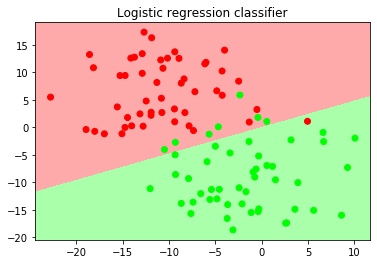


Total Number of Iteration :  9242
--- 13.982489824295044 seconds ---


In [8]:
## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (x[:, 0].max() - x[:, 0].min())*0.05 # add 5% white space to border
y_delta = (x[:, 1].max() - x[:, 1].min())*0.05
x_min, x_max = x[:, 0].min() - x_delta, x[:, 0].max() + x_delta
y_min, y_max = x[:, 1].min() - y_delta, x[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr_predict(theta,np.c_[xx.ravel(), yy.ravel()])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)

## Show the plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression classifier")
plt.show()

print("\nTotal Number of Iteration : ",iter)
print("--- %s seconds ---" % (time.time() - start_time))